In [1]:
import numpy as np
import matplotlib.pyplot as plt

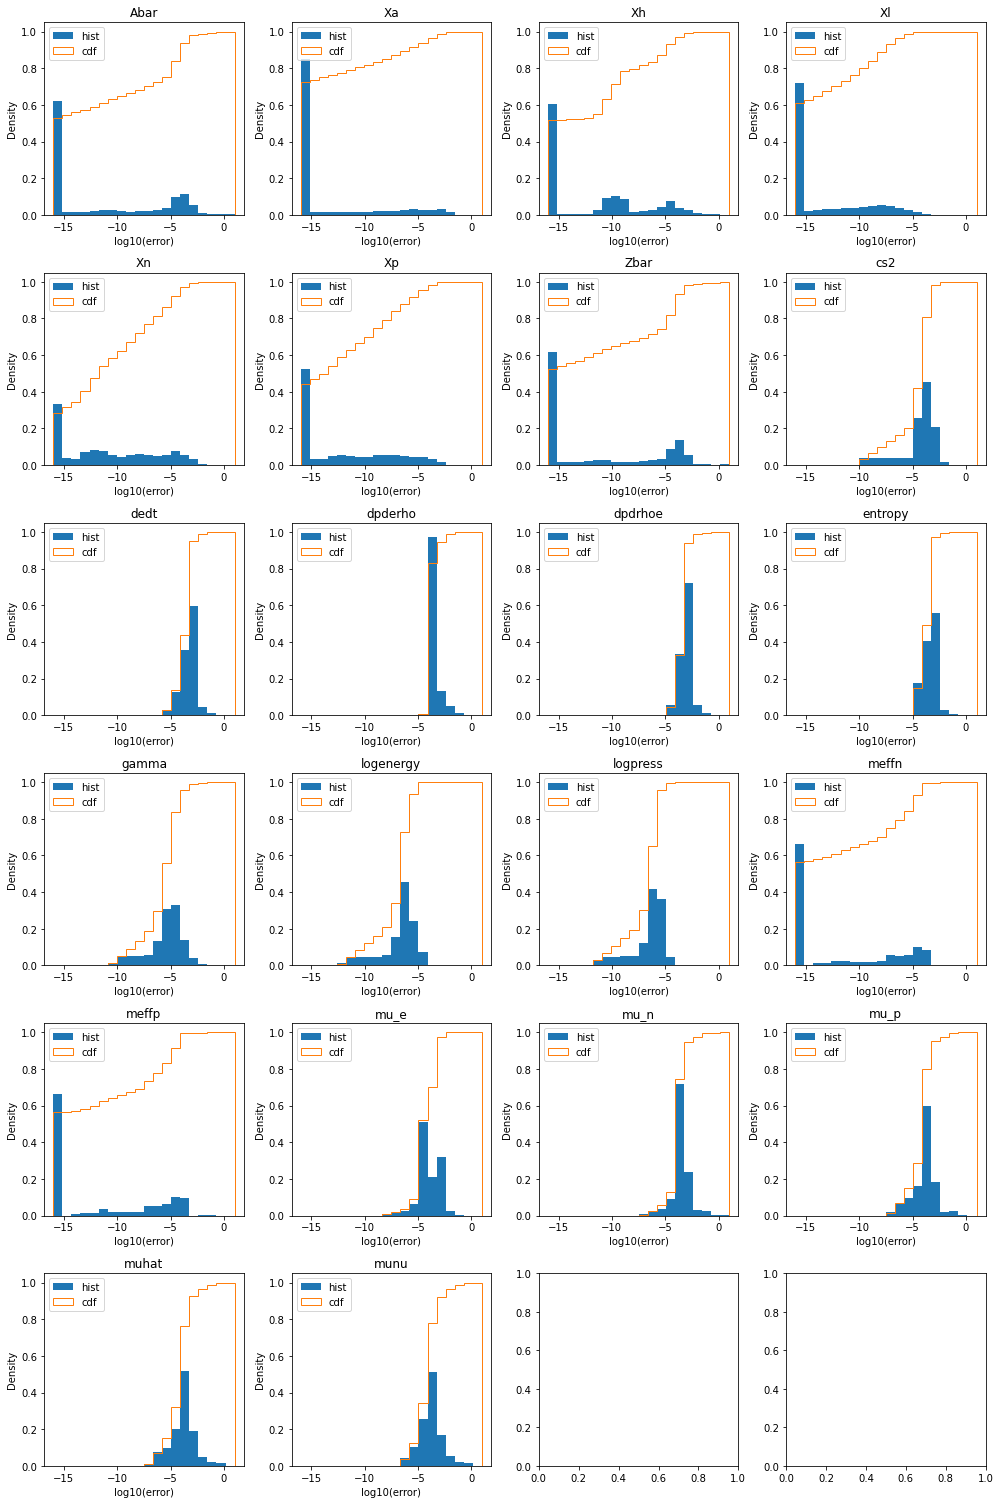

In [29]:
f_vars = ["Abar", "Xa", "Xh", "Xl", "Xn", "Xp", "Zbar", "cs2", 
        "dedt", "dpderho", "dpdrhoe", "entropy", "gamma", "logenergy", 
        "logpress", "meffn", "meffp", "mu_e", "mu_n", "mu_p", "muhat", 
        "munu"]

n_vars = len(f_vars)
# load vars and plot their errors
n_col = 4
n_rows = int(np.ceil(n_vars/float(n_col)))
fig, axs = plt.subplots(n_rows, n_col, figsize=[3.5*n_col, 3.5*n_rows])
for k, var in enumerate(f_vars):
    n_bins = 20
    # load var
    axs = np.atleast_2d(axs)
    i = k // n_col
    j = k % n_col
    errors_raw = np.load(f"./error_data/errors_{var}.npy", 'r')
    errors = errors_raw.copy()
    # remove infinities
    errors[errors > 10] = 10
    errors[errors < 1e-16] = 1e-16
    errors = np.log10(errors)
    axs[i,j].hist(errors.flatten(), bins=n_bins, density=True, range=[-16, 1], label='hist')
    axs[i,j].hist(errors.flatten(), bins=n_bins, density=True, range=[-16, 1], cumulative=True, histtype='step', label='cdf')
    axs[i,j].set_xlabel("log10(error)")
    axs[i,j].set_ylabel("Density")
    axs[i,j].set_title(var)
    axs[i,j].legend(loc='upper left')
plt.tight_layout()
plt.savefig("./error_plot_hist.png")
plt.show()

In [7]:
sum(errors == np.infty)


54

In [8]:
len(errors)

8388608

In [39]:
import h5py 

with h5py.File("../../../tables/SRO_subset_factor2.h5") as data:
    abar = data["Abar"]
    print(abar.shape)
    print(abar[32, 12, -1])

(65, 257, 513)
1.0


<Closed HDF5 dataset>